## Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing.

## Data

Relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

## Reading the Data

In [43]:
#impoting required library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Machinelearning library 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('Datasets/Advertising.csv',index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [45]:
df.shape

(200, 4)

In [46]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

<AxesSubplot:>

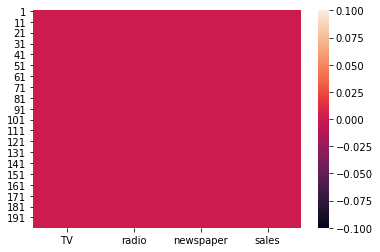

In [47]:
#Checking null value

sns.heatmap(df.isnull())

In [48]:
#Checking distribution of data
df.skew()

#codition checking 0.5 > or <-0.5 

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

    - only the newspaper dataset is having some skewness

TV              AxesSubplot(0.125,0.125;0.168478x0.755)
radio        AxesSubplot(0.327174,0.125;0.168478x0.755)
newspaper    AxesSubplot(0.529348,0.125;0.168478x0.755)
sales        AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

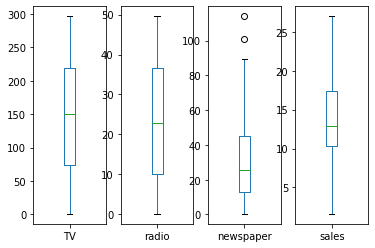

In [49]:
# Checking outlier in the data 
df.plot(kind='box',subplots=True,layout=(1,4))

    Observation : No outlier present in data

In [50]:
# Checking Statistical summary 
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Observation :

     TV
     mean =147.042500
     median(50%) = 149.750000
     SD = 85.854236
     
     radio
     mean =23.264000
     median(50%) = 22.900000
     SD = 14.846809	
     
     newspaper	
     mean =30.554000
     median(50%) = 25.750000	
     SD = 21.778621
     

## Correlation of data

<AxesSubplot:>

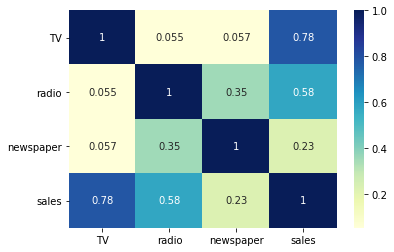

In [51]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [52]:
## Observation

## TV is highly correlated with sales

## Univariant Analysis

In [54]:
# Model selection
x =df.drop(columns='sales',axis=1)
y=df['sales']

print(f"X Shape{x.shape} and Y Shape {y.shape}")

X Shape(200, 3) and Y Shape (200,)


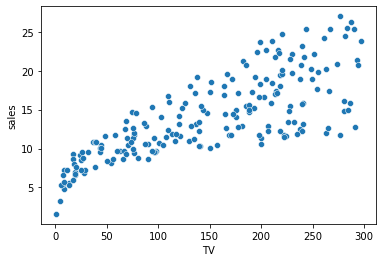

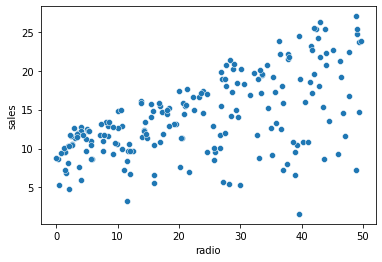

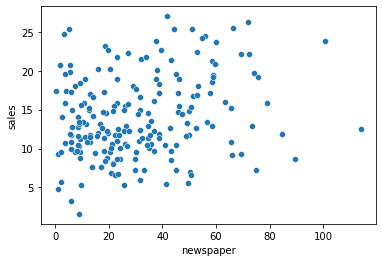

In [73]:
x = ['TV', 'radio', 'newspaper']

for i in x:
    plt.figure()
    sns.scatterplot(df[i],df['sales'])
    plt.xlabel(i)

In [55]:
# Spliting the training and testing data

x_train,x_tets,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=42)

In [56]:
# Size of training and testing data

print (f"x_train {x_train.shape} ,y_train {y_train.shape}")
print(f"x_test {x_tets.shape},y_test {y_test.shape}")

x_train (156, 3) ,y_train (156,)
x_test (44, 3),y_test (44,)


In [57]:
#model building
ls = LinearRegression()
ls.fit(x_train,y_train)
y_prec = ls.predict(x_tets)

In [58]:
# Checking model report
# checking the error
print("error")

print("Mean absolute error",mean_absolute_error(y_test,y_prec))
print("mean square error",mean_squared_error(y_test,y_prec))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_prec)))
# r2 - is coeffient of determination

print("R2 Score ",r2_score(y_test,y_prec))

error
Mean absolute error 1.4023834227666099
mean square error 2.976739828455729
RMSE 1.7253231084222251
R2 Score  0.8990163846003907


In [59]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [60]:
las = Lasso(alpha=0.01)
rid = Ridge(alpha=0.01)
Ela = ElasticNet(alpha=0.01)

model = [las,rid,Ela]

for i in model:
    i.fit(x_train,y_train)
    y_pre =i.predict(x_tets)
    print("Score",i.score(x_train,y_train))
    print(type(i))
    print("_"*40)
  

Score 0.8954907676001387
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
________________________________________
Score 0.895490787221375
<class 'sklearn.linear_model._ridge.Ridge'>
________________________________________
Score 0.8954907808746957
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
________________________________________


# Using cross validation

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
# Model 1

x = df[['TV', 'radio', 'newspaper']]
y = df['sales']
lnrg = LinearRegression()

scores_1=cross_val_score(lnrg,x,y,cv=10)
scores_1.mean()

0.8853562237979616

### Droping the feature which less correlated with response variable

In [63]:
# Model 2

X = df[['TV', 'radio']]   # feature matix 
y = df['sales']    # response vector
lnrg = LinearRegression()

scores_2=cross_val_score(lnrg,x,y,cv=10)
scores_2.mean()

# Accuracy is incresed in this model

0.8853562237979616

In [64]:
x_train,x_tets,y_train,y_test = train_test_split(X,y,random_state=42)

In [65]:
#model building
ls = LinearRegression()
ls.fit(x_train,y_train)
y_prec = ls.predict(x_tets)

In [66]:
print("error")

print("Mean absolute error",mean_absolute_error(y_test,y_prec))
print("mean square error",mean_squared_error(y_test,y_prec))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_prec)))
# r2 - is coeffient of determination

print("R2 Score ",r2_score(y_test,y_prec))
# We need to choose less RMSE model we choosing second model.

error
Mean absolute error 1.3886802126434379
mean square error 2.853994755776103
RMSE 1.6893770318599999
R2 Score  0.8944787062601195


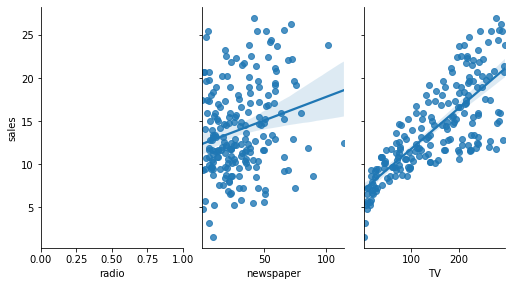

In [75]:
sns.pairplot(data=df,x_vars=['radio','newspaper','TV'],y_vars=['sales'],kind='reg',aspect=0.6,size=4)

In [68]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Saving the Model

In [69]:
import joblib

In [70]:
sales_pre = joblib.dump(ls,"Sales_prediction.obj")

In [71]:
sales_pre = joblib.load("Sales_prediction.obj")
modelpres = sales_pre.predict(x_tets)

r2_score(y_test,modelpres)

0.8944787062601195